<a href="https://colab.research.google.com/github/jonathantlima/webScraping/blob/main/webScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook shows an example of `web scraping` for retrieving data contained in a table. The key idea is to access a webpage using `requests` and from there derive a `DataFrame` and make a plot.**

In [1]:
'''
The library `requests` enables access to a particular URL while `BeautifulSoup`
allows to find and manipulate data within HTML.
'''
import requests
from bs4 import BeautifulSoup

In [2]:
url = 'https://www.statista.com/statistics/793628/worldwide-developer-survey-most-used-languages/'
response = requests.get(url)

In [3]:
'''
The argument `html.parser` is necessary to enable a scan in the corresponding
HTML text, i.e., the HTML file itself which has been previously requested.
'''
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table')

In [4]:
'''
The object `table` was created from the find function of module BeautifulSoup.
This object is subjected to `find_all` function. Warning! It is not native in
Python.
The `columns` object is a list with two entries. While building this notebook I
attempted to use `.text.strip()` directly in each item, however, Python couldn't
handle and raised and error. So I approached `column` to `column`.
'''
dataset = []

for row in table.find_all('tr'):
    columns = row.find_all('td')
    for column in columns:
        dataset.append(column.text.strip())

In [5]:
#Checking if the dataset list was created correctly.
dataset[:5]

['JavaScript', '63.61%', 'HTML/CSS', '52.97%', 'Python']

In [6]:
'''
Since list `dataset` has all entries in a single column, that is necessary to
split the data between programming languages [PL] and percentages [Perc]. One
can verify that every programming language has an even index. The percentages
are converted to float so it can be used to plot.
'''
PL = []
Perc = []

for data in dataset:
    if dataset.index(data) % 2 == 0:
      PL.append(data)
    else:
      Perc.append(float(data.strip('%')))

In [7]:
#The former lists are then used to create a dictionary.
dataset_dict = {
    'Programming Language': PL,
    'Percentage': Perc
}

In [8]:
"Checking if the dictionary was created correctly"
dataset_dict

{'Programming Language': ['JavaScript',
  'HTML/CSS',
  'Python',
  'SQL',
  'TypeScript',
  'Bash/Shell (all shells)',
  'Java',
  'C#',
  'C++',
  'C',
  'PHP',
  'PowerShell',
  'Go',
  'Rust',
  'Kotlin',
  'Ruby',
  'Lua',
  'Dart',
  'Assembly',
  'Swift',
  'R',
  'Visual Basic (.Net)',
  'MATLAB',
  'VBA',
  'Groovy',
  'Delphi',
  'Scala',
  'Perl',
  'Elixir',
  'Objective-C',
  'Haskell',
  'GDScript',
  'Lisp',
  'Solidity',
  'Clojure',
  'Julia',
  'Erlang',
  'F#',
  'Fortran',
  'Prolog',
  'Zig',
  'Ada',
  'OCaml',
  'Apex',
  'Cobol',
  'SAS',
  'Crystal',
  'Nim',
  'APL',
  'Flow',
  'Raku'],
 'Percentage': [63.61,
  52.97,
  49.28,
  48.66,
  38.87,
  32.37,
  30.55,
  27.62,
  22.42,
  19.34,
  18.58,
  13.59,
  13.24,
  13.05,
  9.06,
  6.23,
  6.09,
  6.02,
  5.43,
  4.65,
  4.23,
  4.07,
  3.81,
  3.55,
  3.4,
  3.23,
  2.77,
  2.46,
  2.32,
  2.31,
  2.09,
  1.71,
  1.53,
  1.33,
  1.26,
  1.15,
  0.99,
  0.97,
  0.95,
  0.89,
  0.83,
  0.77,
  0.7,
  0.66,
 

In [9]:
#Creating a DataFrame
import pandas as pd

df = pd.DataFrame(dataset_dict)
df.head()

,Programming Language,Percentage
0,JavaScript,63.61
1,HTML/CSS,52.97
2,Python,49.28
3,SQL,48.66
4,TypeScript,38.87


<ipython-input-17-20593c7b5284>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(df['Programming Language'], rotation=90)


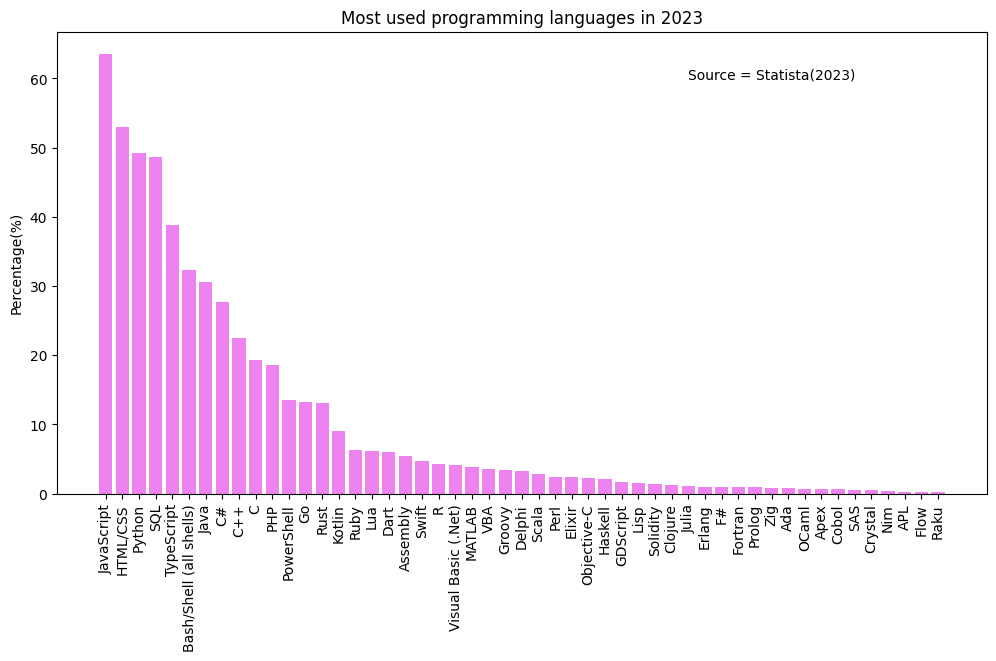

In [17]:
#Plot
import matplotlib.pyplot as plt
graph, plot = plt.subplots(figsize=(12, 6))
plot.bar(df['Programming Language'], df['Percentage'], color='violet')
plot.set_title('Most used programming languages in 2023')
plot.set_ylabel('Percentage(%)')
plot.set_xticklabels(df['Programming Language'], rotation=90)
plot.text('Julia', 60, 'Source = Statista(2023)')
graph.show()